In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


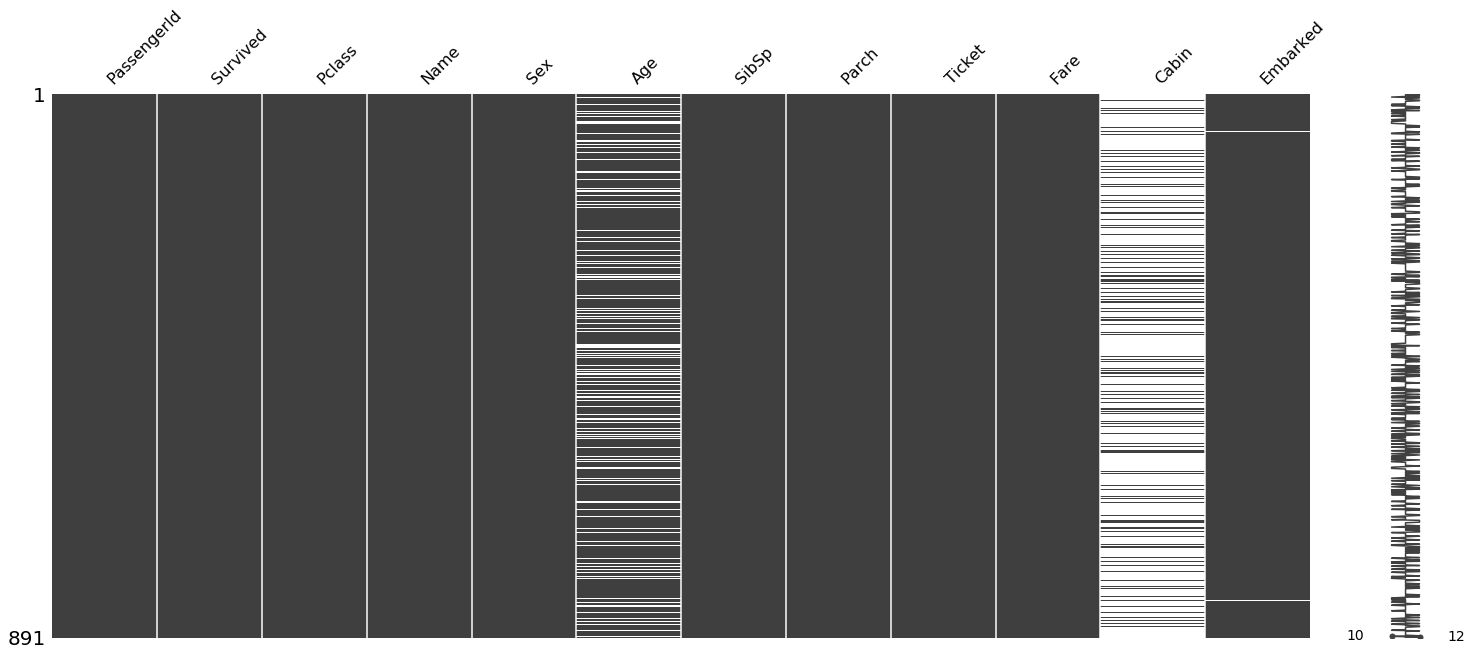

In [4]:
ms.matrix(data)

In [5]:
data.groupby('Pclass')['Age'].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [6]:
data.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [7]:
data.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
         
        elif Pclass == 2:
            return 29
        
        else:
            return 24

    else:
        return Age



In [9]:
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            if Sex == 'male':
                return 40
            elif Sex == 'female':
                return 35
         
        elif Pclass == 2:
             if Sex == 'male':
                return 30
             elif Sex == 'female':
                return 28
        
        else:
             if Sex == 'male':
                return 25
             elif Sex == 'female':
                return 22

    else:
        return Age



In [12]:
def impute_age2(cols):
    Age = cols[0]
    Sex = cols[1]
    
    if pd.isnull(Age):
        if Sex == 'male':
            return 29
        elif Sex == 'female':
            return 27
    else:
        return Age



In [ ]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
data['Age'] = data[['Age','Pclass','Sex']].apply(impute_age1,axis=1)

In [13]:
data['Age'] = data[['Age','Sex']].apply(impute_age2,axis=1)

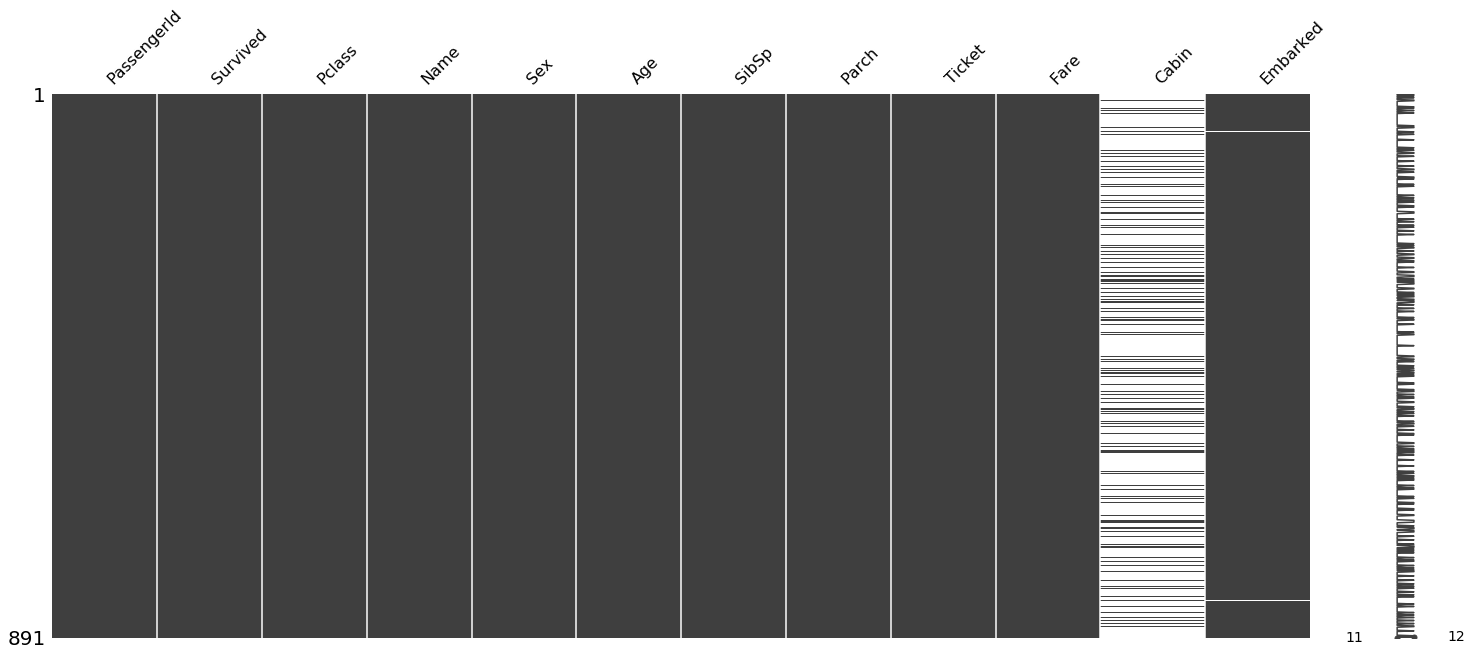

In [14]:
ms.matrix(data)

In [15]:
data.drop('Cabin', axis = 1,inplace=True)

In [16]:
data.dropna(inplace = True)

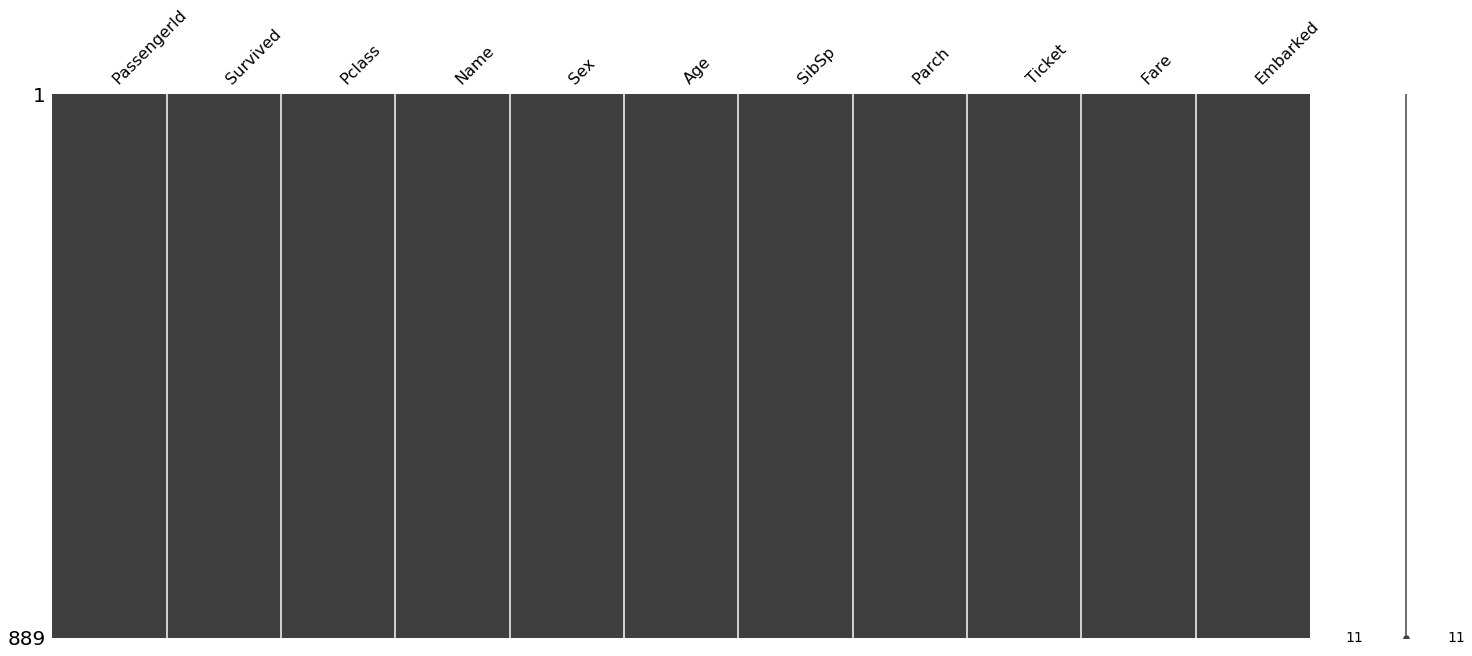

In [17]:
ms.matrix(data)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [21]:
sex_df = pd.get_dummies(data['Sex'],drop_first=3)
sex_df.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
embark_df = pd.get_dummies(data['Embarked'],drop_first=True)
embark_df.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
data = pd.concat([data,sex_df,embark_df],axis=1)

In [27]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.20, 
                                                    random_state=72)

In [29]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\santosh killamsetty\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predicted =  logmodel.predict(X_test)

In [31]:
prod_data=pd.read_csv('production.csv')

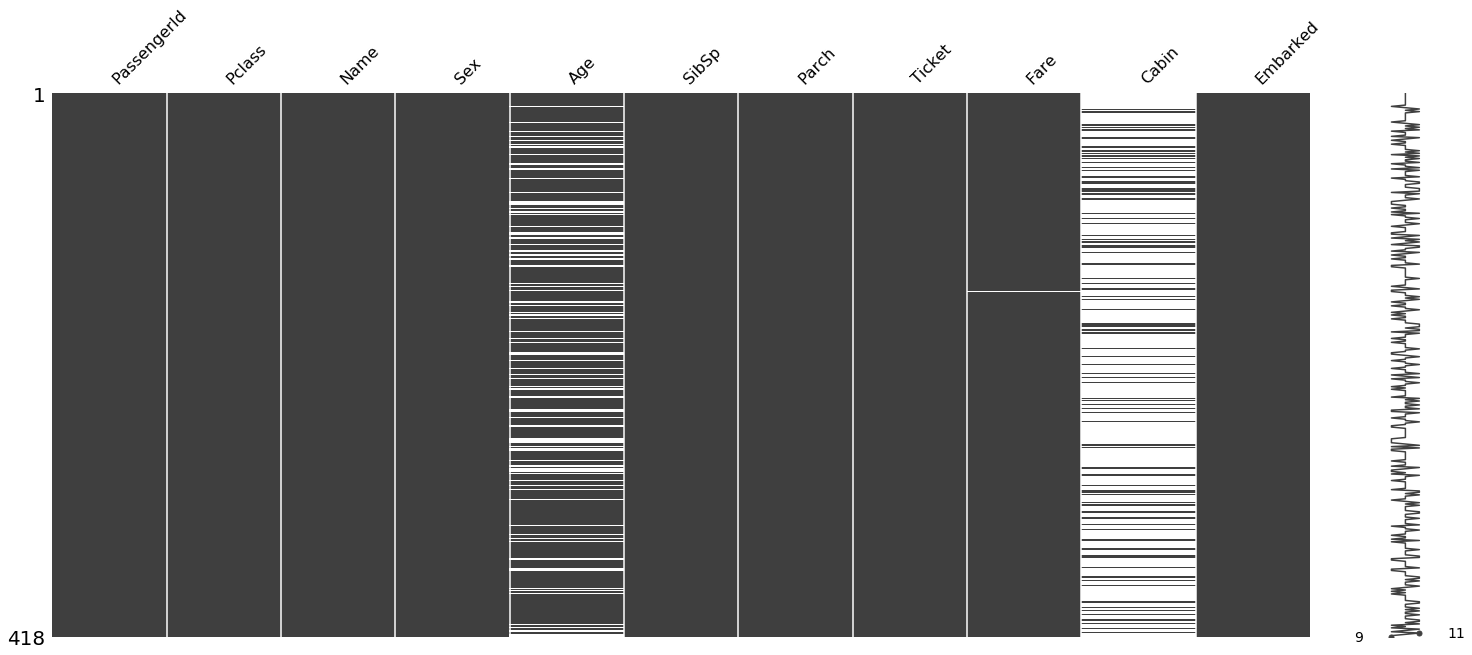

In [32]:
ms.matrix(prod_data)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


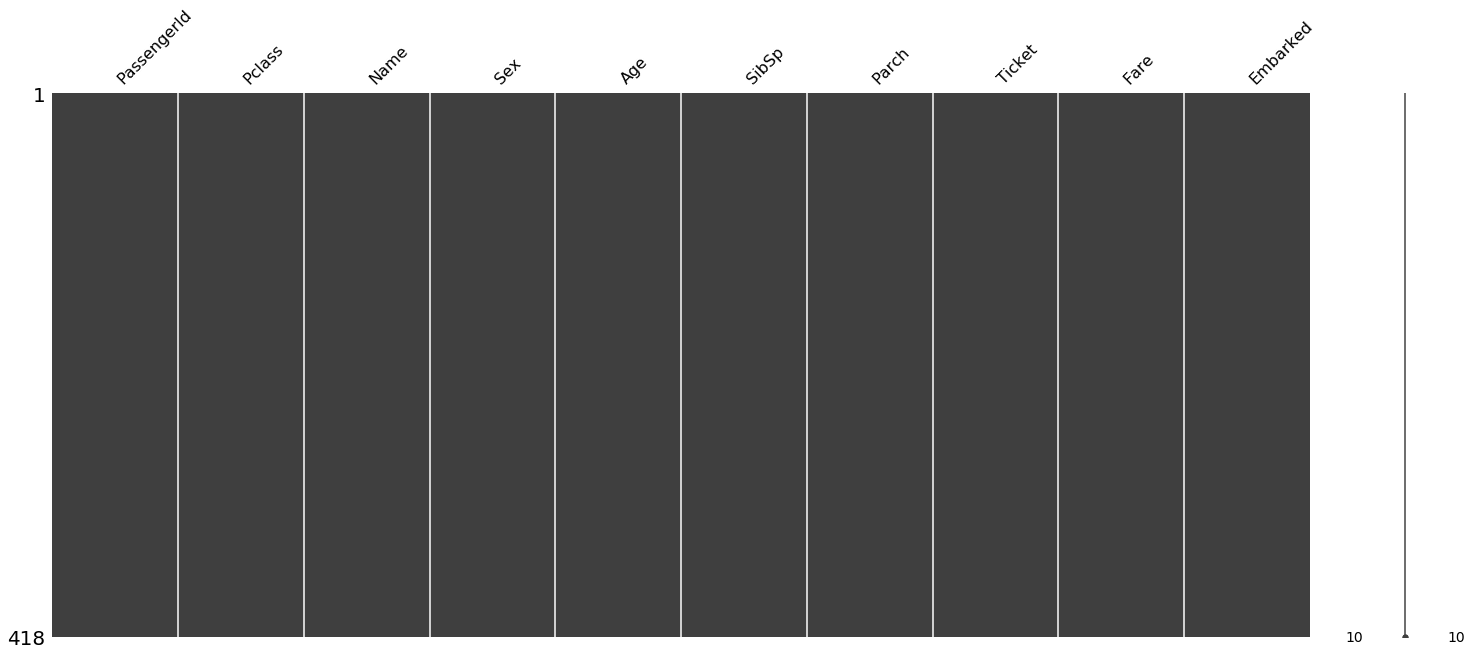

In [33]:
prod_data['Age'] = prod_data[['Age','Sex']].apply(impute_age2,axis=1)

prod_data.drop('Cabin', axis = 1, inplace= True)

prod_data.fillna(prod_data['Fare'].mean(),inplace=True)

ms.matrix(prod_data)

sex = pd.get_dummies(prod_data['Sex'], drop_first=True)
embark = pd.get_dummies(prod_data['Embarked'], drop_first=True)

prod_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

prod_data = pd.concat([prod_data,sex,embark],axis=1)

prod_data.head()

In [34]:
predict1=logmodel.predict(prod_data)

predict1

df1=pd.DataFrame(predict1,columns=['Survived'])

df2=pd.DataFrame(prod_data['PassengerId'],columns=['PassengerId'])

df2.head()

result = pd.concat([df2,df1],axis=1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [35]:
result.to_csv('result2.csv',index=False)